# SOUL Project Phase I
# 테라-루나 코인 붕괴 분석하기


## Part 1. 데이터 불러오기 및 시각화

### 백엔드 연결 및 초기 셋업


먼저 구글 백엔드에 있는 컴퓨터를 나의 구글 드라이브에 연결시킨다.

In [ ]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


그리고 `%cd` 커맨드를 이용하여 기본 폴더에서 SOUL 프로젝트를 위해 새로 만든 "drive/MyDrive/SOUL" 폴더로 이동한다.

여기서 "/"는 폴더의 상하위 관계를 표현한다.  
예를 들어, "A/B/C"는 폴더 A 안에 있는 폴더 B 안에 있는 폴더 C를 의미한다.

이후 `ls` 커맨드를 이용하여 해당 폴더 안에 있는 하위 폴더와 파일을 확인한다.

In [17]:
%cd drive/MyDrive/SOUL/
%ls

[Errno 2] No such file or directory: 'drive/MyDrive/SOUL/'
/content/drive/MyDrive/SOUL
10-minutes-to-pandas.ipynb  SOUL-Project-Phase-I.ipynb
LUNAUSDT-1m-2021-01-28.csv


numpy와 pandas, 그리고 matplotlib.pyplot 패키지를 import한다.

numpy는 다차원 데이터를 다루는 패키지이고, pandas는 numpy를 활용하여 개발된 데이터 가공 라이브러리이다.  
matplotlib.pyplot은 데이터를 도표나 그래프로 시각화하기 위해 사용하는 라이브러리이다.

`as` 뒤에 나오는 `np`, `pd`, `plt`는 각각 라이브러리의 별명이라고 생각하면 된다.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 루나 거래 정보 불러오기

.csv 형태의 루나 코인 거래 정보 데이터를 `pd.read_csv`를 이용하여 불러온다.

`df`는 `pandas.Dataframe` 객체로, 쉽게 생각해서 표(table)라고 할 수 있다.  
`df`는 `df.columns`라는 멤버 객체를 가지고 있는데, 이는 `df`의 각 열의 제목을 리스트로 만든 것이다.

In [47]:
df = pd.read_csv('LUNAUSDT-1m-2022-05-06.csv')
df.columns = ["open_time", "open", "high", "low", "close", "volume", "close_time", "quote_asset_volume", "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"]

df의 모습을 확인해보자.

In [48]:
df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1651795260000,82.27,82.33,82.22,82.29,1321.94,1651795319999,108737.7887,165,394.75,32473.3869,0
1,1651795320000,82.30,82.96,82.24,82.96,7295.80,1651795379999,602823.4094,840,4474.21,369611.5287,0
2,1651795380000,82.97,83.03,82.74,82.88,4019.77,1651795439999,333113.0076,499,1596.36,132283.9177,0
3,1651795440000,82.88,82.98,82.88,82.95,1221.08,1651795499999,101268.7597,156,721.17,59811.2911,0
4,1651795500000,82.95,83.05,82.88,82.91,2726.21,1651795559999,226206.9821,299,1357.00,112636.1089,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1651881300000,77.50,77.50,77.36,77.36,1647.52,1651881359999,127571.7222,120,642.34,49742.6907,0
1435,1651881360000,77.37,77.41,77.32,77.40,826.26,1651881419999,63927.0226,108,211.93,16398.7716,0
1436,1651881420000,77.41,77.46,77.39,77.42,286.44,1651881479999,22179.7564,47,114.31,8851.7381,0
1437,1651881480000,77.42,77.43,77.36,77.41,1501.75,1651881539999,116224.7208,85,797.52,61719.0222,0


데이터가 잘 정리된 것을 확인할 수 있다.

가져온 데이터는 Binance에서 제공하는 루나 코인에 대한 첫 데이터이다.  
Binance에서 제공하는 거래 데이터의 시간 정보는 Unix time으로,  
Jan 1 1970 00:00:00 UTC를 시작 시점으로 지금까지 지나온 시간을 밀리초 단위로 측정한 것이다.

Binance 거래소는 24시간 운영되는데, 데이터셋의 첫 타임스탬프가 1611817260000,  
즉 Thu Jan 28 2021 07:01:00 GMT+0000이라는 점을 들어  
루나 코인이 2021년 1월 28일 처음 바이낸스에 등록된 것으로 오해할 수도 있겠으나 이는 사실이 아니니 유의하자.

### 데이터 가공하기

그나저나 (초보인) 우리에겐 시간에 따른 OHLCV(Open, High, Low, Close, Volume) 데이터만 있으면 충분하다.  
`df.iloc[]`는 `df`에서 지정한 범위의 값을 새로운 `Dataframe` 객체로 반환한다.

간단하게만 설명하자면, `[a:b,c:d]`는 `a`행부터 `b-1`행, `c`열부터 `d-1`열의 범위를 의미한다.  
자세한 내용은 다음 도큐멘테이션([링크1](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)) 혹은  
Pandas 10분 입문 가이드([링크2](https://pandas.pydata.org/docs/user_guide/10min.html)) 또는 그 번역본([링크3](https://dataitgirls2.github.io/10minutes2pandas/))을 참고하자.

슬라이싱을 아직 모른다면 슬라이싱 문법([링크4](https://twpower.github.io/119-python-list-slicing-examples))을 먼저 공부하는 것을 추천한다.

In [49]:
df = df.iloc[:,:6]

다시 df를 출력하면 아래와 같다.

In [50]:
df

,open_time,open,high,low,close,volume
0,1651795260000,82.27,82.33,82.22,82.29,1321.94
1,1651795320000,82.30,82.96,82.24,82.96,7295.80
2,1651795380000,82.97,83.03,82.74,82.88,4019.77
3,1651795440000,82.88,82.98,82.88,82.95,1221.08
4,1651795500000,82.95,83.05,82.88,82.91,2726.21
...,...,...,...,...,...,...
1434,1651881300000,77.50,77.50,77.36,77.36,1647.52
1435,1651881360000,77.37,77.41,77.32,77.40,826.26
1436,1651881420000,77.41,77.46,77.39,77.42,286.44
1437,1651881480000,77.42,77.43,77.36,77.41,1501.75


### 그래프로 각종 데이터 시각화하기

한 번 시가와 종가를 그래프로 표현해볼까?

정말 쉽다. `plt.plot([x축 변수들 리스트],[y축 변수들 리스트])`를 이용하자.

`df.loc`는 정수로 범위를 지정하는 `df.iloc`와 달리 직접 열의 이름을 이용하여 범위를 지정한다.

아래는 시간에 따른 시가(starting price)를 나타낸 그래프이다.  
처음 시작 시간을 뺀 다음 $3600 \times 10^{3}$을 나눠서 밀리초 단위를 시간 단위로 바꿔주었다.

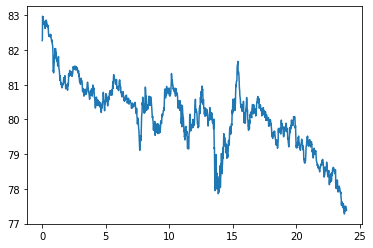

In [51]:
plt.plot((df.loc[:,"open_time"] - df.loc[0, "open_time"])/(3600 * 10**3), df.loc[:, "open"])

그리고 아래는 시간에 따른 종가(closing price)를 나타낸 그래프이다. 시가 그래프와 거의 같다.

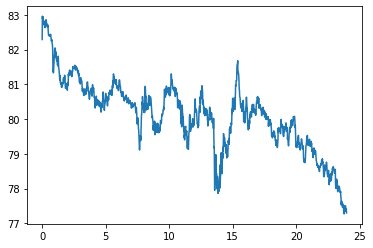

In [52]:
plt.plot((df.loc[:,"open_time"] - df.loc[0, "open_time"])/(3600 * 10**3), df.loc[:, "close"])

**보너스.** 시간에 따른 거래량은 아래 그래프로 나타낼 수 있다.

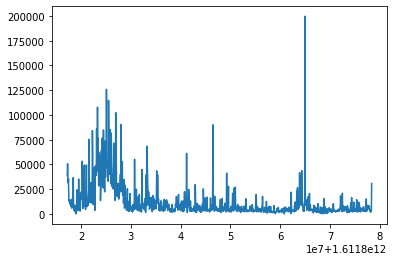

In [25]:
plt.plot(df.loc[:,"Open time"], df.loc[:, "Volume"])

### Candlestick chart 구현하기

시가와 종가를 한 번에 표현할 수는 없을까?  
이를 위해서는 candlestick chart를 사용해야 한다.
[링크](https://www.statology.org/matplotlib-python-candlestick-chart/)의 튜토리얼을 참고하여 시각화해보자.

(1분 간격은 너무 짧으니까) 우선 같은 날의 1시간 간격 k-lines 데이터셋을 불러온다.


In [53]:
df_1h = pd.read_csv('LUNAUSDT-1h-2022-05-06.csv')
df_1h.columns = ["open_time", "open", "high", "low", "close", "volume", "close_time", "quote_asset_volume", "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"]

다음으로 표에서 필요 없는 부분을 df_1h.iloc()을 이용하여 잘라내고 표를 출력해보자.

In [56]:
prices = df_1h.iloc[:, :6]

In [64]:
prices

,open_time,open,high,low,close,volume
0,1651798800000,81.76,82.10,80.84,80.91,150090.41
1,1651802400000,80.91,81.58,80.79,81.10,99172.31
2,1651806000000,81.11,81.19,80.45,80.99,84355.26
3,1651809600000,80.99,80.99,80.17,80.54,97514.58
4,1651813200000,80.54,81.46,80.37,80.90,96842.08
5,1651816800000,80.90,81.17,80.43,80.45,60814.34
6,1651820400000,80.46,80.70,79.06,80.35,225419.90
7,1651824000000,80.34,81.07,79.51,79.67,204673.88
8,1651827600000,79.66,80.99,79.58,80.87,119736.93
9,1651831200000,80.87,81.49,79.73,80.09,142784.24


이제 candlestick chart를 `matplotlib.pyplot`를 활용하여 구현해보자.

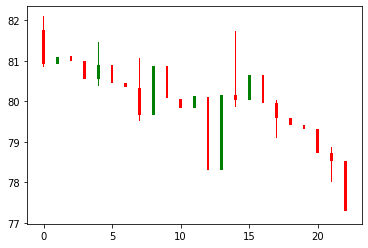

In [61]:
#create figure
plt.figure()

#define width of candlestick elements
width = .2
width2 = .02

#define up and down prices
up = prices[prices.open<=prices.close]
down = prices[prices.open>prices.close]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

#plot down prices
plt.bar(down.index, down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

#display candlestick chart
plt.show()